In [ ]:
# This code was adapted from course material by Jenna Wiens (UMichigan).

import sys
import time

In [ ]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Please specify the full paths to the regression_train.csv
# and regression_test.csv files in your gdrive directory
### ========== START ========== ###
train_path = '/content/gdrive/My Drive/CS/CSM146/regression_train.csv'
test_path = '/content/gdrive/My Drive/CS/CSM146/regression_test.csv'
### ========== END ========== ###

In [ ]:
# Use only the provided packages!
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
######################################################################
# classes
######################################################################

class Data :
    
    def __init__(self, X=None, y=None) :
        """
        Data class.
        
        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """
        
        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y
    
    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.
        
        Parameters
        --------------------
            filename -- string, filename
        """
        
        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")
        
        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]
    
    def plot(self, **kwargs) :
        """Plot data."""
        
        if 'color' not in kwargs :
            kwargs['color'] = 'b'
        
        fig = plt.figure(figsize=(10, 5))
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

In [ ]:
# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [ ]:
def plot_erms(mrange, train_errs, test_errs):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(mrange, train_errs, 'o-', color='red', label='Training')
    plt.plot(mrange, test_errs, 'o-', color='blue', label='Test')
    plt.xlabel(r'$m$', fontsize = 16)
    plt.ylabel(r'$E_{RMS}$', fontsize = 16)
    plt.title('Polynomial regression error')
    plt.legend()
    plt.show()

In [ ]:
class PolynomialRegression() :
    
    def __init__(self, m=1) :
        """
        Ordinary least squares regression.
        
        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m
    
    
    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features
        
        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """
        
        n,d = X.shape
        
        ### ========== START ========== ###
        # part b: modify to create matrix for simple linear model

        # X = np.insert(X, 0, 1, axis=1)    # insert all 1s to new first column of X
        
        # part g: modify to create matrix for polynomial model
        Phi = np.ones((n,1))
        m = self.m_
        for i in range(1, m+1):
          Phi = np.append(Phi, X**i, axis=1)
  
        ### ========== END ========== ###
        
        return Phi
    
    
    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes
        
        Returns
        --------------------
            self    -- an instance of self
        """
        
        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()
        
        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration
        
        start = time.time()

        # GD loop
        for t in range(tmax) :
            ### ========== TODO: START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                eta = 1/(1+t)
            else :
                eta = eta_input
            ### ========== TODO: END ========== ###
                
            ### ========== TODO: START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
            coefs = np.asarray(list(self.coef_))
            for j, _ in enumerate(coefs):
              tot = 0
              for i, xn in enumerate(X):
                tot += (np.dot(coefs, xn) - y[i]) * xn[j]
              # change the weights
              self.coef_[j] -= 2 * eta * tot 

            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = np.dot(X, np.transpose(self.coef_))
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)                
            ### ========== TODO: END ========== ###
            
            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break
            
            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec
        stop = time.time()
        runtime = stop - start
        print('number of iterations: %d' % (t+1))
        print("Runtime: " + str(runtime))
        return self
    
    
    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            
        Returns
        --------------------        
            self    -- an instance of self
        """
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO: START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        start = time.time()

        self.coef_ = np.linalg.pinv(np.dot(np.transpose(X),X)).dot(np.transpose(X)).dot(y)

        stop = time.time()
        runtime = stop - start
        print("coefficients: " + str(self.coef_) + "\truntime: " + str(runtime)) 
        ### ========== TODO: END ========== ###
    
    
    def predict(self, X) :
        """
        Predict output for X.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
        
        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO: START ========== ###
        # part c: predict y
        y = np.dot(X, np.transpose(self.coef_))
        ### ========== TODO: END ========== ###
        
        return y
    
    
    def cost(self, X, y) :
        """
        Calculates the objective function.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO: START ========== ###
        # part d: compute J(theta)
        cost = 0
        h = self.predict(X)
        for i in range(len(h)):
          y_pred = h[i]
          cost += np.power(y_pred - y[i], 2)
        ### ========== TODO: END ========== ###
        return cost
    
    
    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        cost = self.cost(X, y)
        error = np.sqrt(cost/len(X))
        ### ========== TODO : END ========== ###
        return error
    
    
    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'
        
        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()


Visualizing data...
Train data


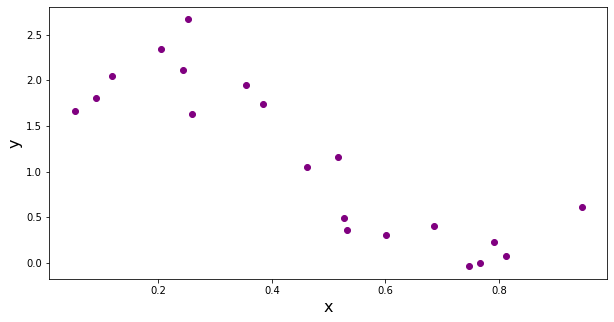

Test data


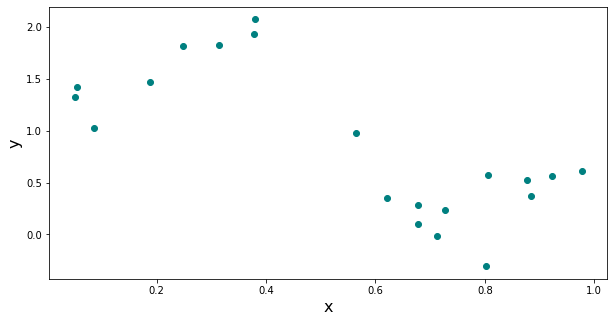

Investigating linear regression...
Part d.1
Model cost: 40.233847409671
Part d.3
number of iterations: 10000
Runtime: 1.2500827312469482
eta: 1e-06	coefficients: [0.36400847 0.09215787]	model_cost: 25.86329625891011

number of iterations: 10000
Runtime: 1.2036230564117432
eta: 1e-05	coefficients: [ 1.15699657 -0.22522908]	model_cost: 13.158898555756045

number of iterations: 7056
Runtime: 0.8566114902496338
eta: 0.001	coefficients: [ 2.44640682 -2.81635304]	model_cost: 3.9125764057918757



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:110: RuntimeWarning: overflow encountered in power
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in double_scalars


number of iterations: 10000
Runtime: 1.213618516921997
eta: 0.05	coefficients: [nan nan]	model_cost: nan

Part e
coefficients: [ 2.44640709 -2.81635359]	runtime: 0.0014395713806152344
Part f
number of iterations: 745
Runtime: 0.0864107608795166
eta: 1/(1+t)	coefficients: [ 2.44640687 -2.81635313]	model_cost: 3.9125764057917527
Investigating polynomial regression...
coefficients: [1.13010595]	runtime: 0.00024962425231933594
coefficients: [ 2.44640709 -2.81635359]	runtime: 0.0008645057678222656
coefficients: [ 2.52261018 -3.27003073  0.47430873]	runtime: 0.0013818740844726562
coefficients: [  1.22314252  10.64961621 -34.08367975  23.5902309 ]	runtime: 0.0011327266693115234
coefficients: [  0.80752148  17.32934851 -62.32907523  66.75220156 -21.61184508]	runtime: 0.0007708072662353516
coefficients: [  1.15374      9.78404283 -14.96393419 -54.05134693 111.94065953
 -53.20467364]	runtime: 0.0006623268127441406
coefficients: [   1.60312815   -2.21295605   87.09165639 -440.63842785  832.541870

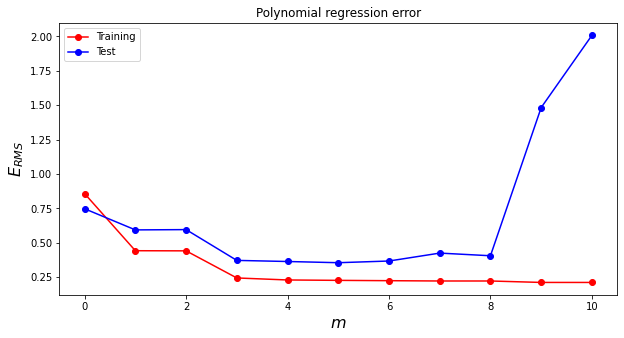

Done!


In [ ]:
######################################################################
# main
######################################################################

def main():
    # load data
    train_data = load_data(train_path)
    test_data = load_data(test_path)
    
    
    ### ========== TODO: START ========== ###
    # part a: main code for visualizations
    print('Visualizing data...')
    print("Train data")
    plot_data(train_data.X, train_data.y, color="purple")
    print("Test data")
    plot_data(test_data.X, test_data.y, color="teal")
    ### ========== TODO: END ========== ###

    ### ========== START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')
    print("Part d.1")
    model = PolynomialRegression()
    model.coef_ = np.zeros(2)
    print("Model cost: " + str(model.cost(train_data.X, train_data.y)))
    print("Part d.3")

    learning_rate = [10**-6, 10**-5, 10**-3, 0.05]
    for n in learning_rate:
      model.fit_GD(train_data.X, train_data.y, eta=n)
      print("eta: " + str(n) + "\tcoefficients: " +str(model.coef_) + "\tmodel_cost: " +str(model.cost(train_data.X, train_data.y)))
      print()

    print("Part e")
    model.fit(train_data.X, train_data.y)

    print("Part f")
    model.fit_GD(train_data.X, train_data.y)
    print("eta: 1/(1+t)\tcoefficients: " +str(model.coef_) + "\tmodel_cost: " +str(model.cost(train_data.X, train_data.y)))


    ### ========== END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print('Investigating polynomial regression...')
    train_error = []
    test_error = []
    degrees = np.arange(11)
    for m in degrees:
      model = PolynomialRegression(m)
      model.fit(train_data.X, train_data.y)
      train_error.append(model.rms_error(train_data.X, train_data.y))
      test_error.append(model.rms_error(test_data.X, test_data.y))
      
    xmin = degrees[np.argmin(test_error)]
    print("Best degree polynomial: " + str(xmin))

    plot_erms(degrees, train_error, test_error)
        
    ### ========== TODO : END ========== ###
    
    
    print("Done!")

if __name__ == "__main__":
    main()
